<h1><center style="color:#f59364; font-family:cursive;">Hospital Performance Analysis🏥</center></h1>

<h3  style="text-align:center;"><span class="label label-success">EDA,</span> <span class="label label-success">KPI & Data Analysis,</span> <span class="label label-success">Data Visualization</span></h3>

***

# Cardiac Care Quality: US Hospital Performance

## 📄 Dataset Description

This dataset provides **granular insights into the quality and performance of cardiac care services** across hospitals in the United States, covering data from **2008 onwards**.

It includes information on:

- **Cardiac Surgery**
- **Percutaneous Coronary Interventions (PCI)**

These data are highly valuable for:

- 📊 Healthcare analytics  
- 🏥 Hospital performance benchmarking  
- 🧬 Public health research  
- 📈 Trend and outlier analysis

## 📦 Key Features

- Aggregated metrics by:
  - **Hospital**
  - **Procedure type**
  - **Year**

- Enables:
  - Trend analysis over time
  - Regional comparisons
  - Identification of high-performing or outlier facilities


## 🎯 Objective

**The primary goal of this analysis is to derive actionable insights into:**

- Hospital performance in cardiac care procedures (e.g., PCI, CABG, Valve)
- Differences between observed and expected mortality rates
- Identification of high-performing hospitals across the U.S.
- Detection and treatment of statistical outliers in mortality-related metrics
- Regional trends and variations in cardiac care outcomes
- Confidence interval analysis to assess reliability of mortality data

* DATAset link : https://www.kaggle.com/datasets/yaminh/cardiac-care-quality-us-hospital-performance


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD LIBRARY & DATASET</div>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots
import pprint

In [2]:
data = pd.read_csv("../datasets/cardiac_data_cleaned_engineered.csv")

In [3]:
data.shape

(2812, 23)

In [4]:
#### to dispaly all feature without wrap in data.head()
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Facility_ID,Hospital_Name,Detailed_Region,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_Higher_Than_Expected_Mortality,Is_Lower_Than_Expected_Mortality,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference
0,1,Albany Med. Ctr,Capital District,Capital District,All PCI,2016,680,17,2.50,1.52,2.03,1.18,3.26,Rate not different than Statewide Rate,2016,2016,2016,Rate not different than Statewide Rate,False,False,True,0.98,0.47
1,1045,White Plains Hospital,NY Metro - New Rochelle,NY Metro - New Rochelle,Non-Emergency PCI,2015,338,1,0.30,0.64,0.34,0.00,1.91,Rate not different than Statewide Rate,2015,2015,2015,Rate not different than Statewide Rate,False,False,True,-0.34,-0.04
2,1438,Bellevue Hospital Ctr,Manhattan,NY Metro - NYC,All PCI,2010,448,4,0.89,0.89,0.84,0.23,2.16,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,False,False,True,0.00,0.05
3,1439,Beth Israel Med Ctr,Manhattan,NY Metro - NYC,All PCI,2010,1762,11,0.62,0.70,0.75,0.38,1.35,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,False,False,True,-0.08,-0.13
4,1178,Bronx-Lebanon-Cncourse,Bronx,NY Metro - NYC,All PCI,2010,65,4,6.15,2.41,2.15,0.58,5.50,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,False,False,True,3.74,4.00


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA OVERVIEW</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Facility_ID                          2812 non-null   int64  
 1   Hospital_Name                        2812 non-null   object 
 2   Detailed_Region                      2812 non-null   object 
 3   Region                               2812 non-null   object 
 4   Procedure                            2812 non-null   object 
 5   Year_of_Hospital_Discharge           2812 non-null   object 
 6   Number_of_Cases                      2812 non-null   int64  
 7   Number_of_Deaths                     2812 non-null   int64  
 8   Observed_Mortality_Rate              2812 non-null   float64
 9   Expected_Mortality_Rate              2812 non-null   float64
 10  Risk_Adjusted_Mortality_Rate         2812 non-null   float64
 11  Lower_Limit_of_Confidence_Inte

In [7]:
data.describe()

,Facility_ID,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Start_Year,End_Year,Mid_Year,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2757.000000,2757.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,897.571124,1080.069701,18.603841,2.065509,1.950423,2.077287,0.900511,5.929300,2013.844595,2014.679587,2014.262091,0.115085,-0.011778
std,602.381608,4359.572902,74.354456,1.699924,1.202760,1.752055,0.967809,24.886388,2.991336,2.872502,2.890744,1.189586,0.734439
min,0.000000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.580000,2008.000000,2010.000000,2009.000000,-7.450000,-6.290000
25%,456.500000,202.000000,3.000000,0.810000,0.947500,0.840000,0.170000,2.300000,2011.000000,2012.000000,2012.000000,-0.460000,-0.210000
50%,885.000000,375.000000,7.000000,1.605000,1.610000,1.560000,0.540000,3.980000,2014.000000,2015.000000,2014.000000,0.000000,0.000000
75%,1438.000000,702.250000,13.000000,2.992500,2.810000,3.000000,1.370000,6.000000,2016.000000,2017.000000,2017.000000,0.500000,0.210000
max,3058.000000,54276.000000,1021.000000,20.000000,8.060000,14.590000,6.660000,1228.420000,2019.000000,2019.000000,2019.000000,14.610000,12.620000


In [8]:
def Columns_Info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
Columns_Info(data)

,Column,Unique Values,null values
0,Facility_ID,72,0
1,Hospital_Name,114,0
2,Detailed_Region,12,0
3,Region,8,0
4,Procedure,6,0
5,Year_of_Hospital_Discharge,20,0
6,Number_of_Cases,1219,0
7,Number_of_Deaths,116,0
8,Observed_Mortality_Rate,568,0
9,Expected_Mortality_Rate,474,0


## All Unique Values of Categorical Feature 

In [9]:
data['Region'].unique()

array(['Capital District', 'NY Metro - New Rochelle', 'NY Metro - NYC',
       'Western NY - Rochester', 'Western NY - Buffalo', 'Central NY',
       'NY Metro - Long Island', 'New York State'], dtype=object)

In [10]:
data['Detailed_Region'].unique()    ## Region and detailed region has not sigmificant difference so we will remove this feature.

array(['Capital District', 'NY Metro - New Rochelle', 'Manhattan',
       'Bronx', 'Kings', 'Western NY - Rochester', 'Queens',
       'Western NY - Buffalo', 'Central NY', 'NY Metro - Long Island',
       'Staten Island', 'New York State'], dtype=object)

In [11]:
data['Procedure'].unique()

array(['All PCI', 'Non-Emergency PCI', 'Valve or Valve/CABG', 'TAVR',
       'CABG', 'Emergency PCI'], dtype=object)

In [12]:
data['Comparison_Results'].unique()  ## Comparison_Results_Category also same as this feature

array(['Rate not different than Statewide Rate',
       'Rate significantly higher than Statewide Rate',
       'Rate significantly lower than Statewide Rate', 'Statewide Rate'],
      dtype=object)

In [13]:
data['Hospital_Name'].value_counts().head(15)

Hospital_Name
Mount Sinai Hospital       55
Lenox Hill Hospital        55
Maimonides Medical Ctr     55
Montefiore - Moses         55
North Shore Univ Hosp      55
Westchester Med Ctr        55
Montefiore - Weiler        55
Strong Memorial Hosp       55
St. Francis Hospital       55
Rochester General Hosp     55
Univ. Hosp-Stony Brook     55
NYS - All Hospitals        55
Vassar Bros. Med Ctr       54
St. Elizabeth Med Ctr      54
Staten Island Univ Hosp    53
Name: count, dtype: int64

In [14]:
data['Year_of_Hospital_Discharge'].unique()  ### data collection year 

array(['2016', '2015', '2010', '2013-2015', '2008-2010', '2011',
       '2014-2016', '2009-2011', '2010-2012', '2012', '2014', '2012-2014',
       '2011-2013', '2013', '2017', '2015-2017', '2018', '2016-2018',
       '2019', '2017-2019'], dtype=object)

In [15]:
data['Is_As_Expected_Mortality'].unique()

array([ True, False])

In [16]:
data['Is_Higher_Than_Expected_Mortality'].unique()  ## highre and lower fence has only false value, it does't make sence so we will simply remove this features.

array([False])

In [17]:
data['Is_Lower_Than_Expected_Mortality'].unique()

array([False])

In [18]:

data['Is_As_Expected_Mortality'].unique()

array([ True, False])

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">NULL & OUTLIER TREATMENT</div>

In [19]:
### we drop this features, this is not improtant and has unwanted values.

data.drop((['Is_Higher_Than_Expected_Mortality','Is_Lower_Than_Expected_Mortality','Detailed_Region','Facility_ID']) , axis=1, inplace=True)

### Drop Hosptals by name

In [20]:
data = data[data['Hospital_Name'] != 'NYS - All Hospitals']  ### we will drop these Hopitals because it has difference between Observed_Mortality_Rate, Expected_Mortality_Rate, Risk_Adjusted_Mortality_Rate it is not possible that it has not difference. 

drop_hosp = data[data['Hospital_Name'] == 'NYS - All Hospitals']
print(f"Dropping {drop_hosp.shape[0]} statewide summary rows.")

Dropping 0 statewide summary rows.


In [21]:
data[data['Hospital_Name']=='NYS - All Hospitals']

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference


#### before Treat Null and outliers

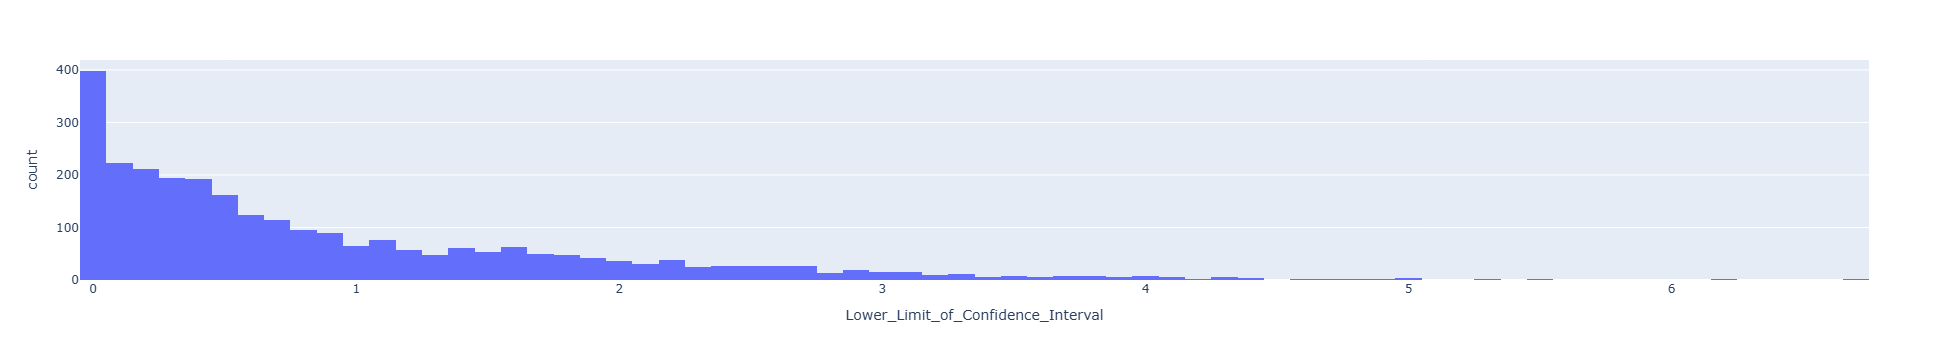

In [22]:
fig = px.histogram(data, x="Lower_Limit_of_Confidence_Interval")
fig.show()

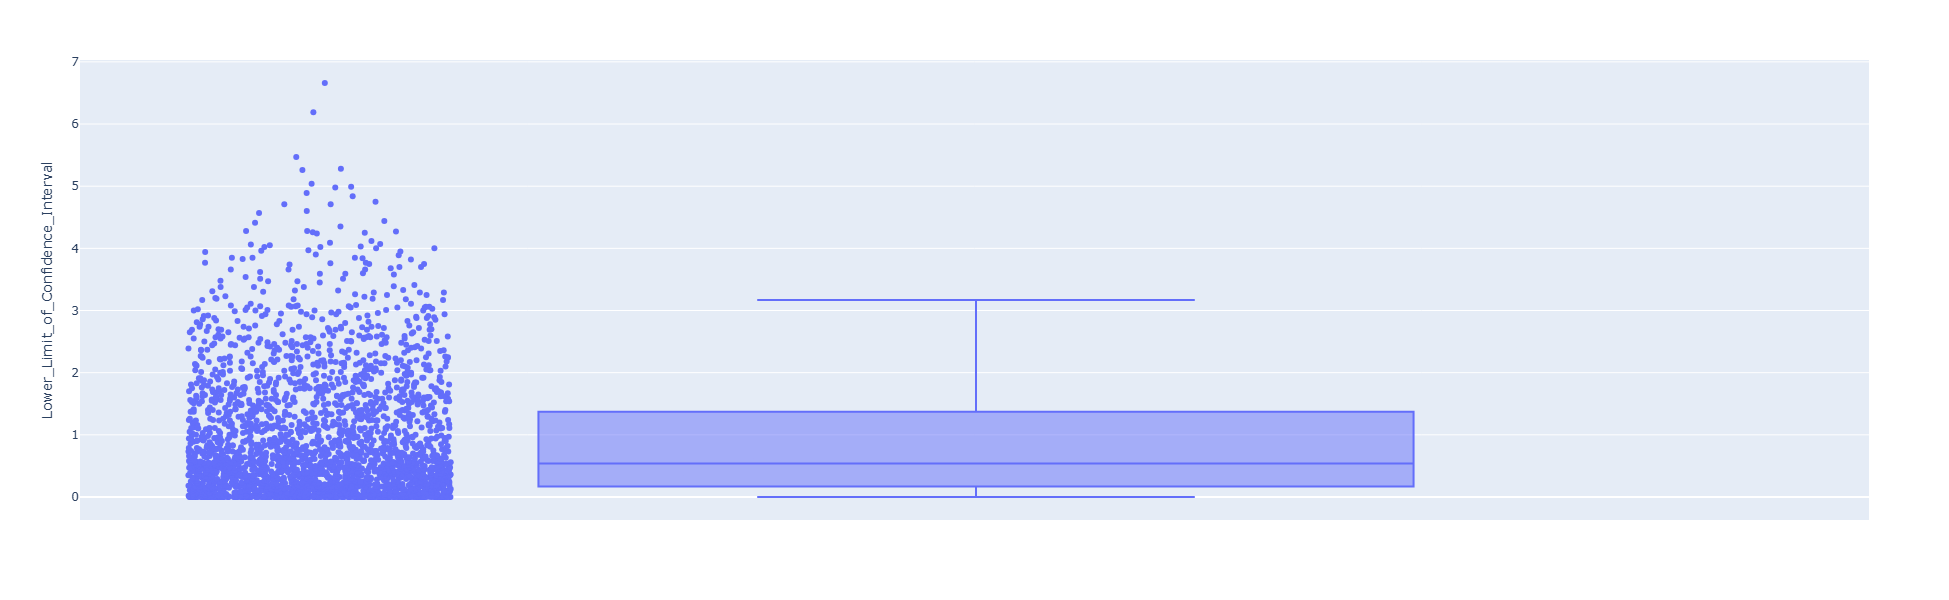

In [23]:
fig = px.box(data, y="Lower_Limit_of_Confidence_Interval", points='all')
fig.update_layout(width = 1300, height = 600)
fig.show()

In [31]:
lower_95th = data['Lower_Limit_of_Confidence_Interval'].quantile(0.95)

print(f"Lower Limit of CI: min =  95th percentile {lower_95th:.2f}")


Lower Limit of CI: min =  95th percentile 2.46


In [32]:
mask_2 = data['Lower_Limit_of_Confidence_Interval'] > 3.17  ## above then upper fence

## Replace corresponding Upper Limit values with the median of all Lower limits
median_upper = data['Lower_Limit_of_Confidence_Interval'].median()
data.loc[mask_2, 'Lower_Limit_of_Confidence_Interval'] = median_upper


In [33]:
##  fill null with mediun
data['Lower_Limit_of_Confidence_Interval'] = data['Lower_Limit_of_Confidence_Interval'].fillna(data['Lower_Limit_of_Confidence_Interval'].median())

In [34]:
## Let's Replace all value of lower limit which is Greater then Upper limit values using random range.
mask = data[data['Lower_Limit_of_Confidence_Interval'] > data['Upper_Limit_of_Confidence_Interval']]

n_outliers = mask.shape[0]
random_vals = np.random.uniform(0, 2, size=n_outliers)
data.loc[mask.index, 'Lower_Limit_of_Confidence_Interval'] = random_vals

In [35]:
data['Lower_Limit_of_Confidence_Interval'].isna().sum()  

np.int64(0)

### After treat Null and outlier

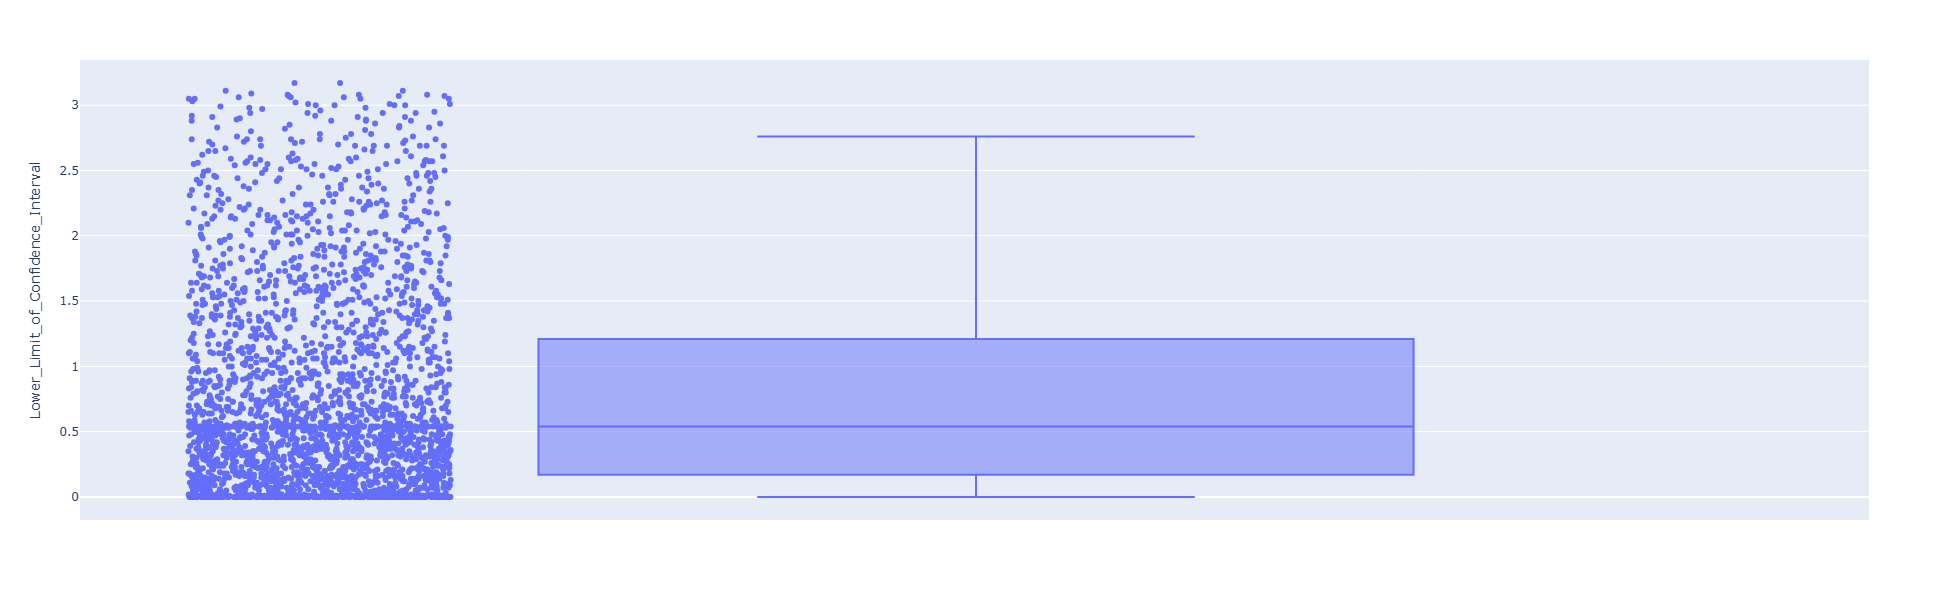

In [36]:
fig = px.box(data, y="Lower_Limit_of_Confidence_Interval", points='all')
fig.update_layout(width = 1300, height = 600)
fig.show()

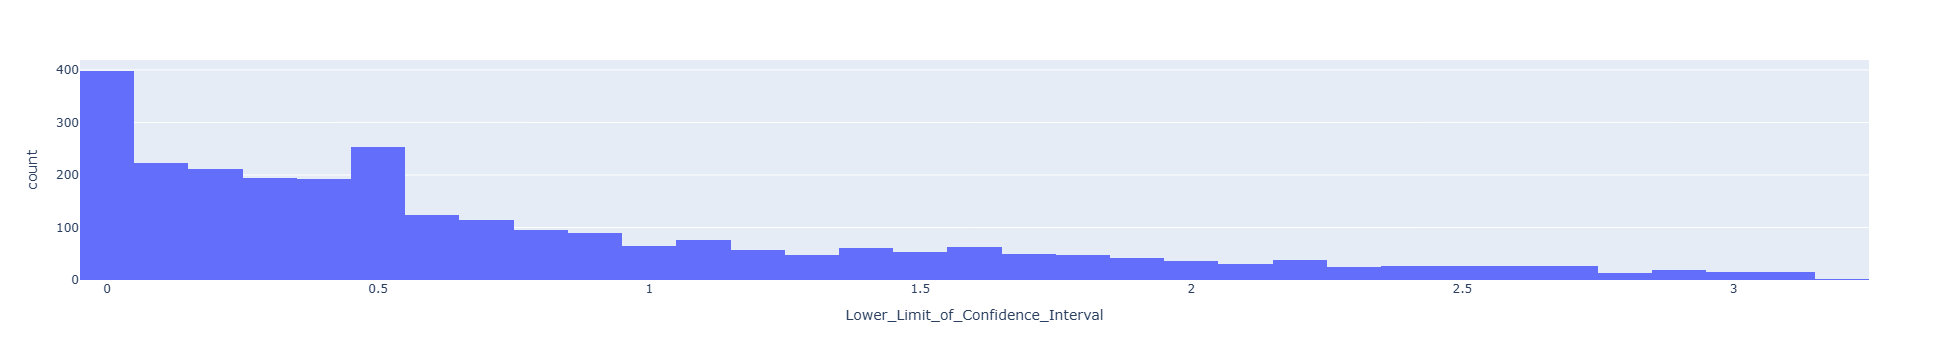

In [37]:
fig = px.histogram(data, x="Lower_Limit_of_Confidence_Interval")
fig.show()

### Before treat Null and outlier (Upper limit of confidence interval)

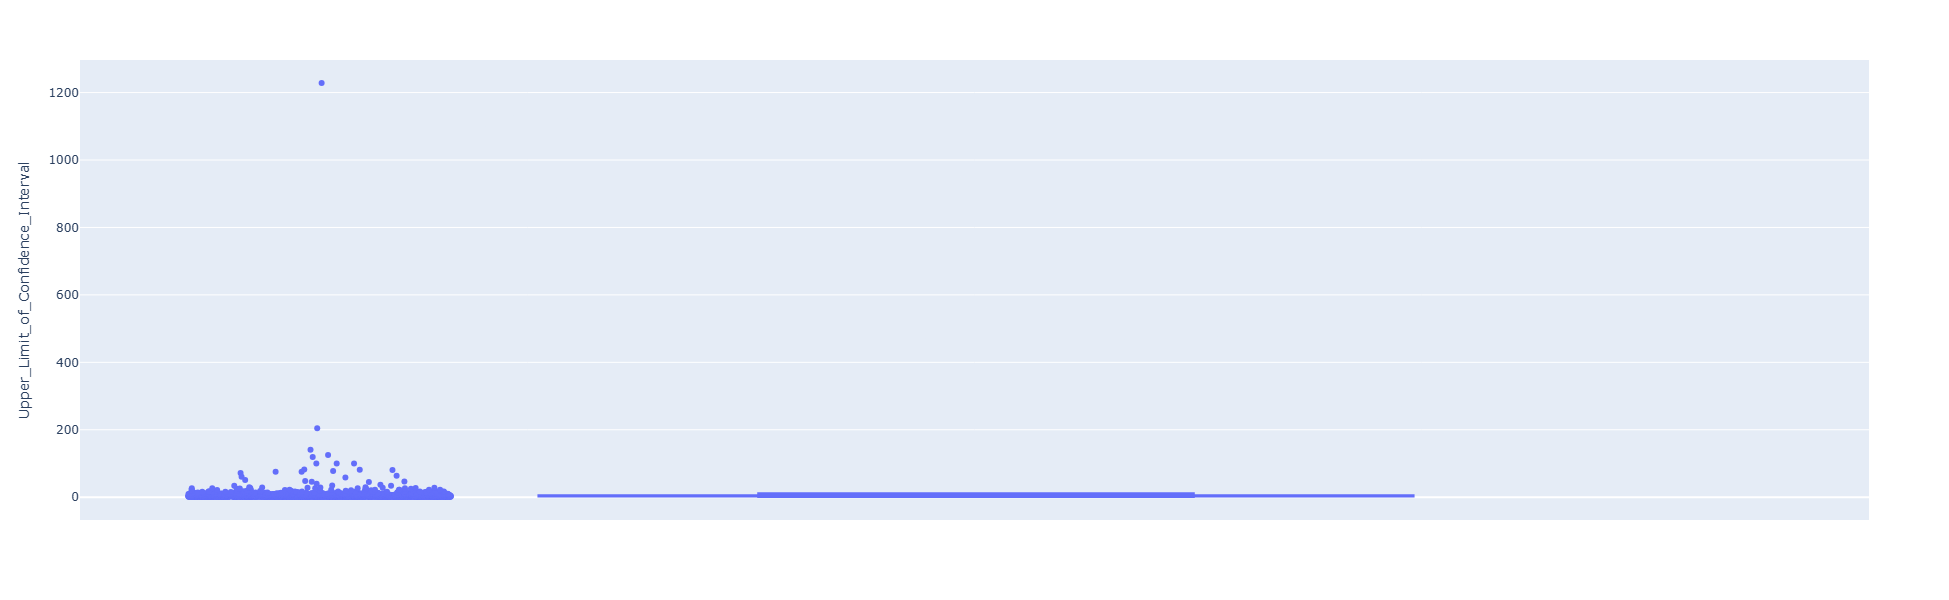

In [38]:
fig = px.box(data, y="Upper_Limit_of_Confidence_Interval", points='all')
fig.update_layout(width = 1300, height = 600)
fig.show()

In [39]:
mask = data[data['Upper_Limit_of_Confidence_Interval'] > 6]

n_outliers = mask.shape[0]
random_vals = np.random.uniform(2, 6.2, size=n_outliers)
data.loc[mask.index, 'Upper_Limit_of_Confidence_Interval'] = random_vals

In [40]:
### here we replace all value which is Greater than Upper limit confidence interval because Lower limit cannot grater than upper limit.

mask = data[data['Lower_Limit_of_Confidence_Interval'] > data['Upper_Limit_of_Confidence_Interval']]


n_outliers = mask.shape[0]
random_vals = np.random.uniform(3,6.1 , size=n_outliers) #### 
data.loc[mask.index, 'Upper_Limit_of_Confidence_Interval'] = random_vals

In [41]:
data['Upper_Limit_of_Confidence_Interval'] = data['Upper_Limit_of_Confidence_Interval'].fillna(data['Upper_Limit_of_Confidence_Interval'].median())

In [42]:
data['Upper_Limit_of_Confidence_Interval'].isna().sum()

np.int64(0)

### After treat Null and outlier (Upper limit of confidence interval)

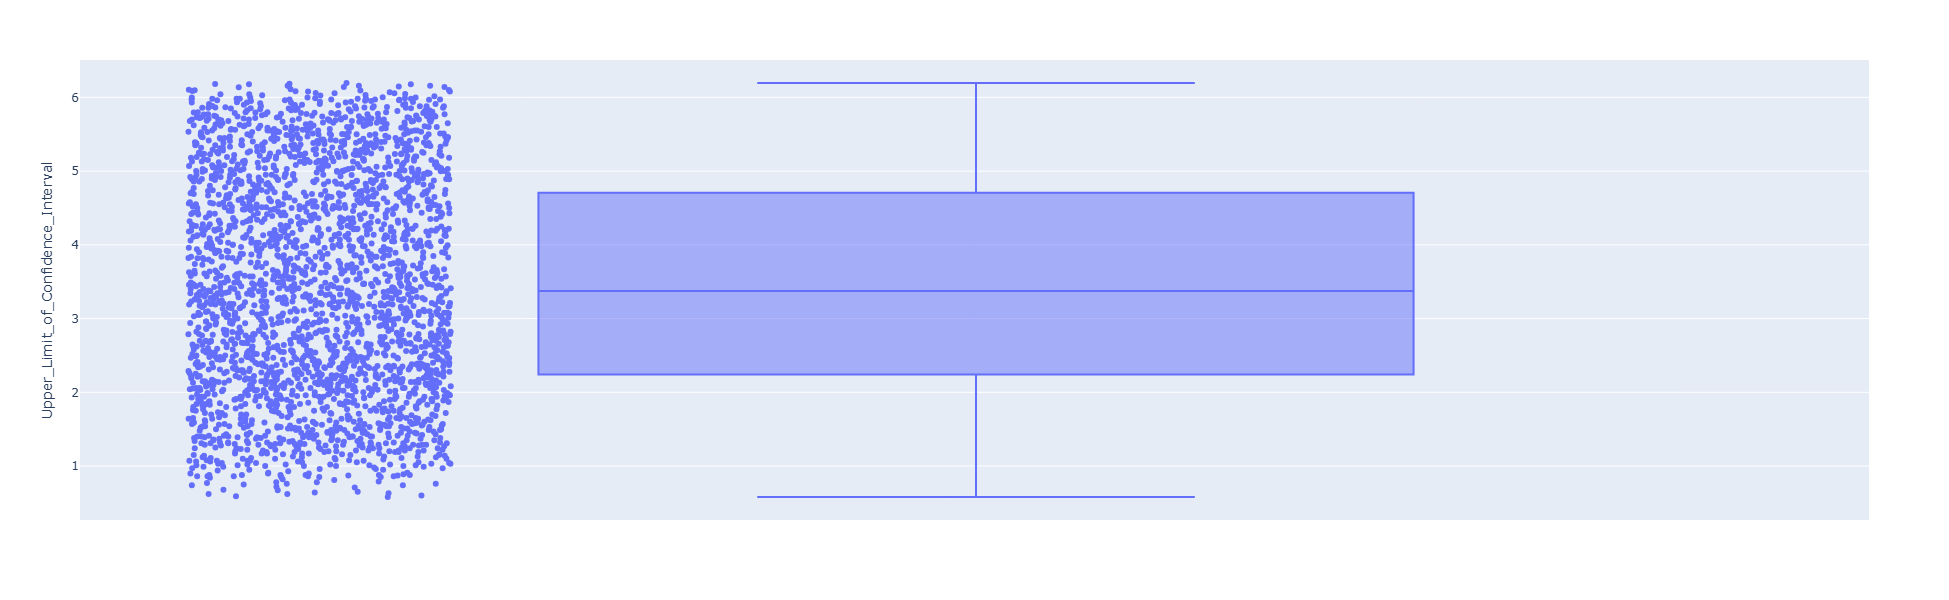

In [43]:
fig = px.box(data, y="Upper_Limit_of_Confidence_Interval", points='all')
fig.update_layout(width = 1300, height = 600)
fig.show()

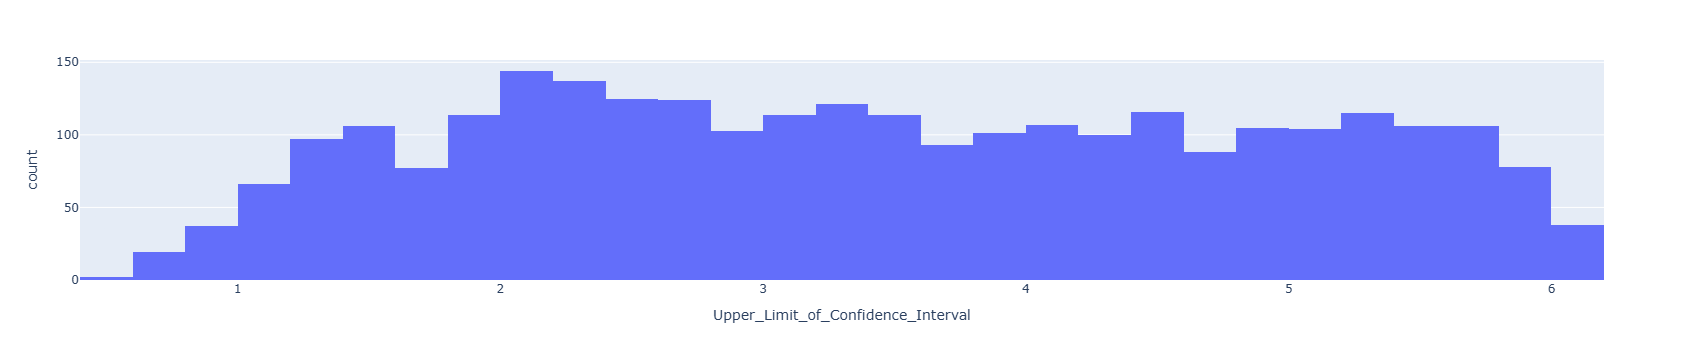

In [44]:
fig = px.histogram(data, x="Upper_Limit_of_Confidence_Interval")
fig.show()

In [45]:
lower_95th = data['Upper_Limit_of_Confidence_Interval'].quantile(0.20)

print(f"Lower Limit of CI: min =  95th percentile {lower_95th:.2f}")

Lower Limit of CI: min =  95th percentile 2.05


In [46]:
data['Upper_Limit_of_Confidence_Interval'].describe()

count    2757.000000
mean        3.458140
std         1.453517
min         0.580000
25%         2.240000
50%         3.374068
75%         4.706258
max         6.195279
Name: Upper_Limit_of_Confidence_Interval, dtype: float64

#### **Let's check is there any Lower Limit confidence interval which is higer than upper limit confidence interval..**

In [47]:
check = data[data['Lower_Limit_of_Confidence_Interval'] > data['Upper_Limit_of_Confidence_Interval']]
check   

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA ANALYSIS</div>

# **OVERALL PERFORMANCE**

In [48]:
avg_mortality_rate = data['Observed_Mortality_Rate'].mean()
print(f"Average Mortality rate : {avg_mortality_rate:.2f}%")

Average Mortality rate : 2.07%


In [49]:
Expected_mortality_rate = data['Expected_Mortality_Rate'].mean()
print(f"Average Expected Mortality rate : {Expected_mortality_rate:.2f}%")

Average Expected Mortality rate : 1.95%


In [50]:
risk_adjusted_mortality_rate = data['Risk_Adjusted_Mortality_Rate'].mean()
print(f"Average Risk Adjusted Mortality rate : {risk_adjusted_mortality_rate:.2f}%")

Average Risk Adjusted Mortality rate : 2.08%


In [51]:
obseved_vs_expected = data['Observed_vs_Expected_Difference'].mean()
print(f"Observed vs Expected  Mortality Difference Average : {obseved_vs_expected:.2f}%")

Observed vs Expected  Mortality Difference Average : 0.12%


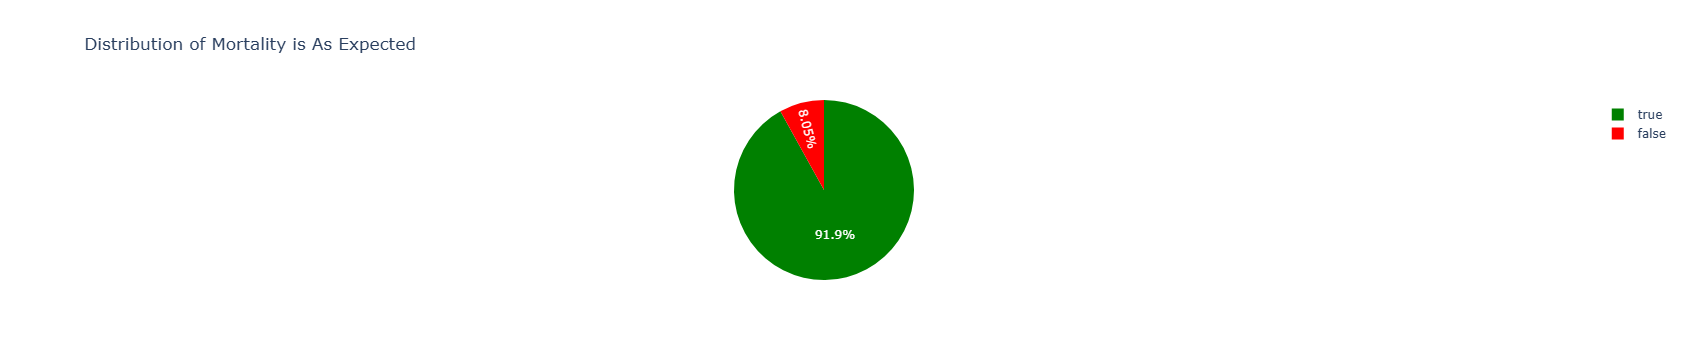

In [52]:
value_counts = data['Is_As_Expected_Mortality'].value_counts().reset_index()
value_counts.columns = ['Is_As_Expected_Mortality', 'Count']

fig = px.pie(
    value_counts,
    names='Is_As_Expected_Mortality',
    values='Count',
    title='Distribution of Mortality is As Expected',
    color='Is_As_Expected_Mortality',
    color_discrete_map={True: 'green', False: 'red'}
)
fig.update_layout(
    width = 600
    
)

fig.show()


### Here we can see that above 90 % expected mortality is True Comparatively Observed mortality.

In [53]:
data['Start_Year'].max()

np.int64(2019)

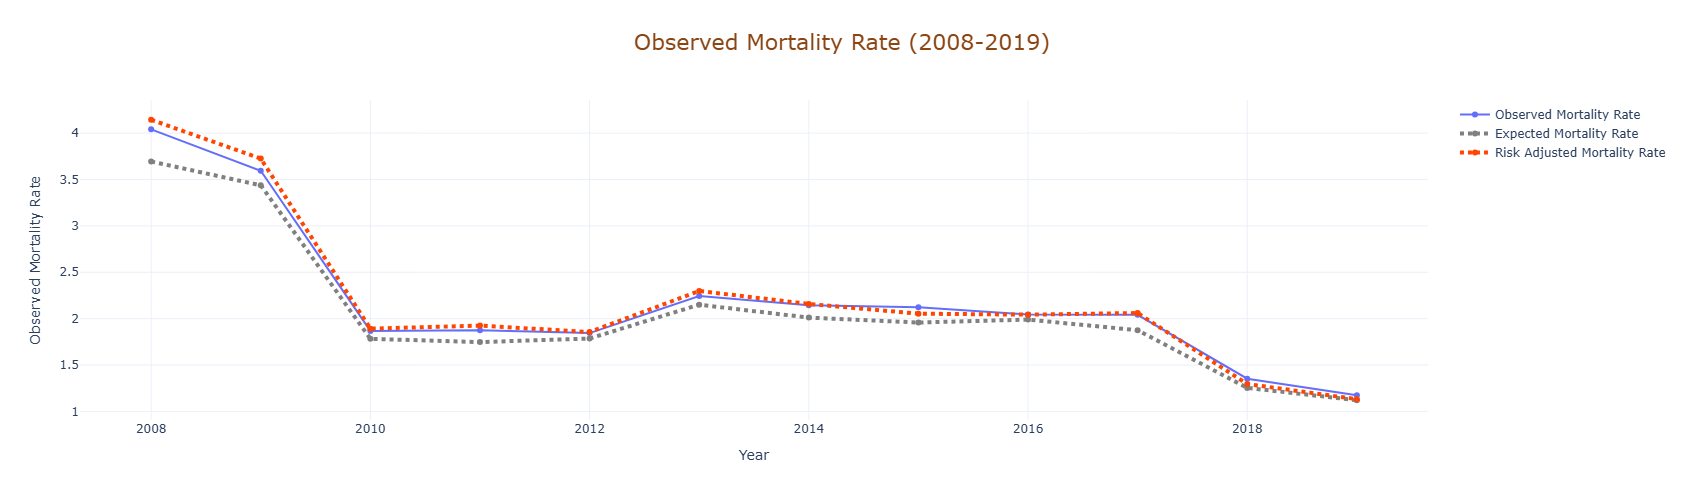

In [54]:
group_observed = data.groupby('Start_Year', as_index=False)['Observed_Mortality_Rate'].mean()
group_expected = data.groupby('Start_Year', as_index=False)['Expected_Mortality_Rate'].mean()
group_rist_adjusted = data.groupby('Start_Year', as_index=False)['Risk_Adjusted_Mortality_Rate'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=group_observed['Observed_Mortality_Rate'],
    x=group_observed['Start_Year'],
    name='Observed Mortality Rate',
    
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    y=group_expected['Expected_Mortality_Rate'],
    x=group_expected['Start_Year'],
    name='Expected Mortality Rate',
    line = dict(color='grey', width=4, dash='dot'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    y=group_rist_adjusted['Risk_Adjusted_Mortality_Rate'],
    x=group_rist_adjusted['Start_Year'],
    line=dict(color='#FF4500', width=4, dash='dot'),
    name='Risk Adjusted Mortality Rate',
    marker=dict(size=6)
))

fig.update_layout(
    title=dict(
        text='Observed Mortality Rate (2008-2019)',
        font=dict(size=22, color='saddlebrown'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='Observed Mortality Rate',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()

### 🔑 Key Points
* Average mortality rates are decreasing over time.

* Environmental pollution and lifestyle-related diseases are on the rise.

* People are becoming more vulnerable to chronic illnesses.

* Medical advancements and better healthcare systems are helping reduce death rates.

* The decline in mortality does not necessarily reflect better overall health.

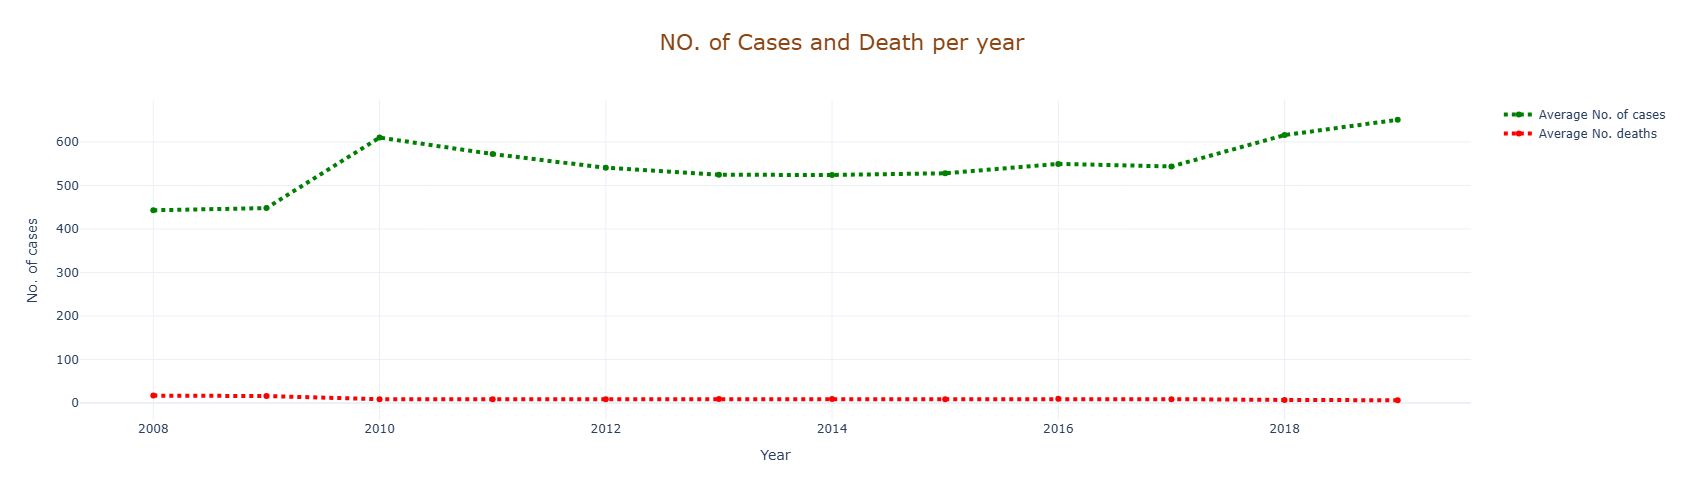

In [55]:
group_observed = data.groupby('Start_Year', as_index=False)['Number_of_Cases'].mean()
group_expected = data.groupby('Start_Year', as_index=False)['Number_of_Deaths'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=group_observed['Number_of_Cases'],
    x=group_observed['Start_Year'],
    name='Average No. of cases',
    line = dict(color='green', width=4, dash='dot'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    y=group_expected['Number_of_Deaths'],
    x=group_expected['Start_Year'],
    line=dict(color='red', width=4, dash='dot'),
    name='Average No. deaths',
    marker=dict(size=6)
))

fig.update_layout(
    title=dict(
        text='NO. of Cases and Death per year ',
        font=dict(size=22, color='saddlebrown'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='No. of cases',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()

### 🔍 Observations & Insights:

* The average number of cases is gradually increasing over the years.

* Despite more cases, the number of deaths remains relatively constant, showing no significant upward trend.

* Interestingly, the average deaths in 2008 were higher than in 2018 and 2019.

* This indicates a significant improvement in treatment quality and healthcare performance over time.

* Better clinical outcomes, even with more patient load, suggest enhanced hospital efficiency and capability.

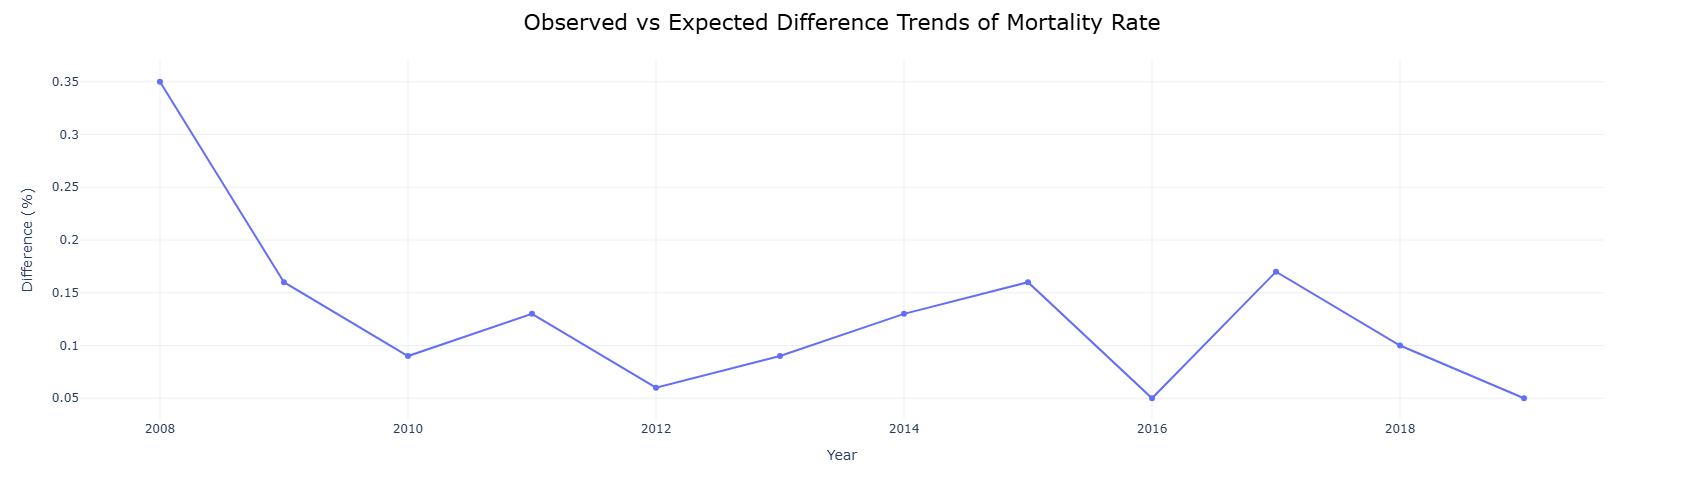

In [56]:
mortality_difference= data.groupby('Start_Year', as_index=False)['Observed_vs_Expected_Difference'].mean().round(2)

fig = px.line(mortality_difference, x="Start_Year", y="Observed_vs_Expected_Difference",markers=True)

fig.update_layout(
    title=dict(
        text='Observed vs Expected Difference Trends of Mortality Rate',
        font=dict(size=22, color='black'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='Difference (%)',
    template='plotly_white',
    height=500,
    width=900
)
fig.show()

In [57]:
data.head()

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference
0,Albany Med. Ctr,Capital District,All PCI,2016,680,17,2.50,1.52,2.03,1.18,3.26,Rate not different than Statewide Rate,2016,2016,2016,Rate not different than Statewide Rate,True,0.98,0.47
1,White Plains Hospital,NY Metro - New Rochelle,Non-Emergency PCI,2015,338,1,0.30,0.64,0.34,0.00,1.91,Rate not different than Statewide Rate,2015,2015,2015,Rate not different than Statewide Rate,True,-0.34,-0.04
2,Bellevue Hospital Ctr,NY Metro - NYC,All PCI,2010,448,4,0.89,0.89,0.84,0.23,2.16,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,0.00,0.05
3,Beth Israel Med Ctr,NY Metro - NYC,All PCI,2010,1762,11,0.62,0.70,0.75,0.38,1.35,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,-0.08,-0.13
4,Bronx-Lebanon-Cncourse,NY Metro - NYC,All PCI,2010,65,4,6.15,2.41,2.15,0.58,5.50,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,3.74,4.00


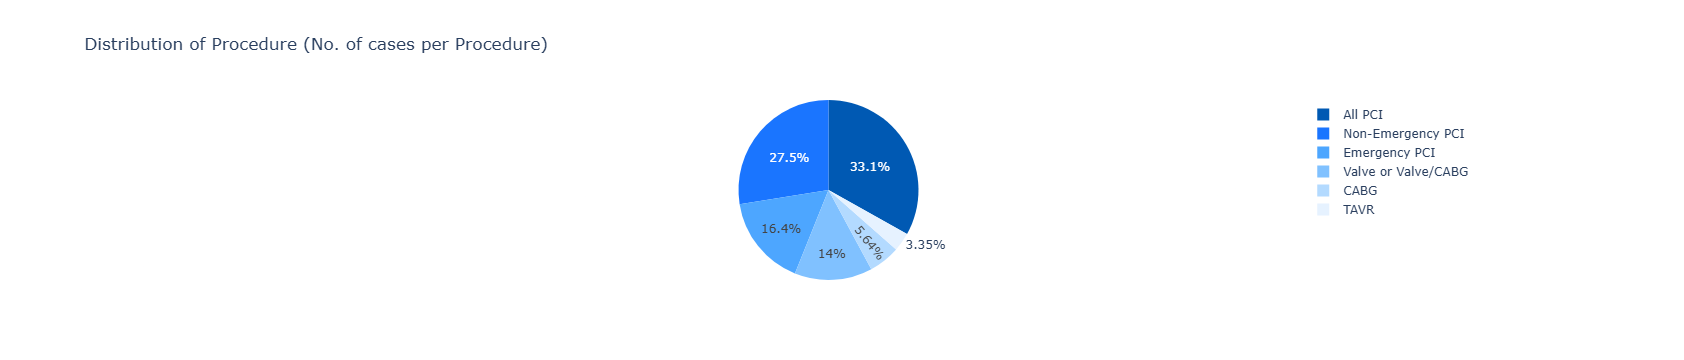

In [58]:
procedure_counts= data.groupby('Procedure', as_index=False)['Number_of_Cases'].sum()

blue_shades = ['#0059b3', '#1a75ff', '#4da6ff', '#80c1ff', '#b3daff', '#e6f2ff'] ## custom colors 

fig = px.pie(
    procedure_counts,
    names='Procedure',
    values='Number_of_Cases',
    title='Distribution of Procedure (No. of cases per Procedure)',
    # color='Procedure',
    color_discrete_map={True: 'green', False: 'red'},
    color_discrete_sequence= blue_shades
)
fig.update_layout(
    width = 700
    
)

fig.show()


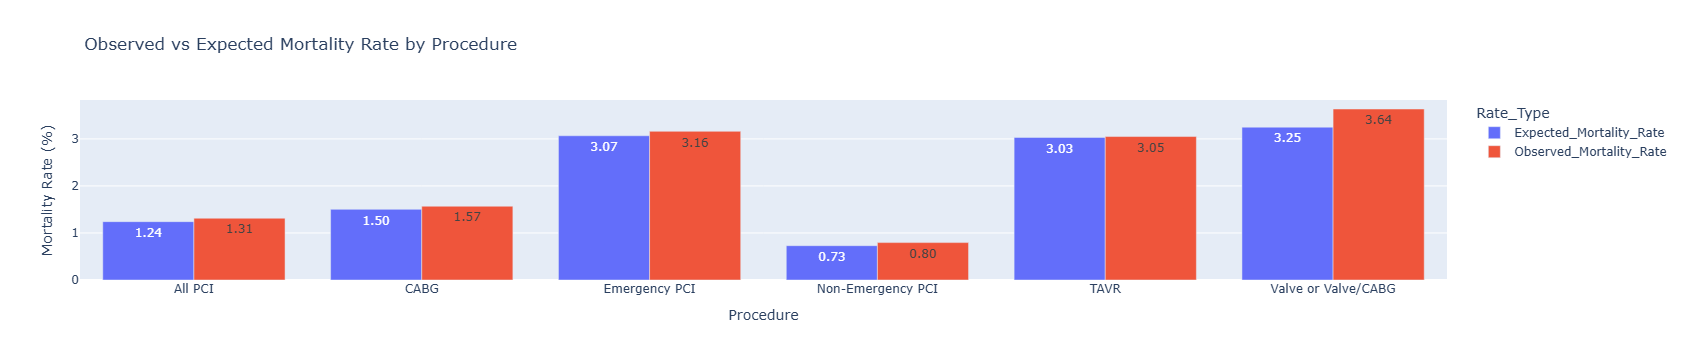

In [59]:
mortality_summary = data.groupby('Procedure', as_index=False)[
    ['Expected_Mortality_Rate', 'Observed_Mortality_Rate']
].mean()

mortality_melted = mortality_summary.melt(
    id_vars='Procedure',
    value_vars=['Expected_Mortality_Rate', 'Observed_Mortality_Rate'],
    var_name='Rate_Type',
    value_name='Rate'
)

fig = px.bar(
    mortality_melted,
    x='Procedure',
    y='Rate',
    color='Rate_Type',
    barmode='group',
    title='Observed vs Expected Mortality Rate by Procedure',
    labels={'Rate': 'Mortality Rate (%)'},
    text_auto='.2f'
)

fig.update_layout(width = 1200)
fig.show()


In [60]:
difference_of_confidence_interval = data['Upper_Limit_of_Confidence_Interval'] - data['Lower_Limit_of_Confidence_Interval']


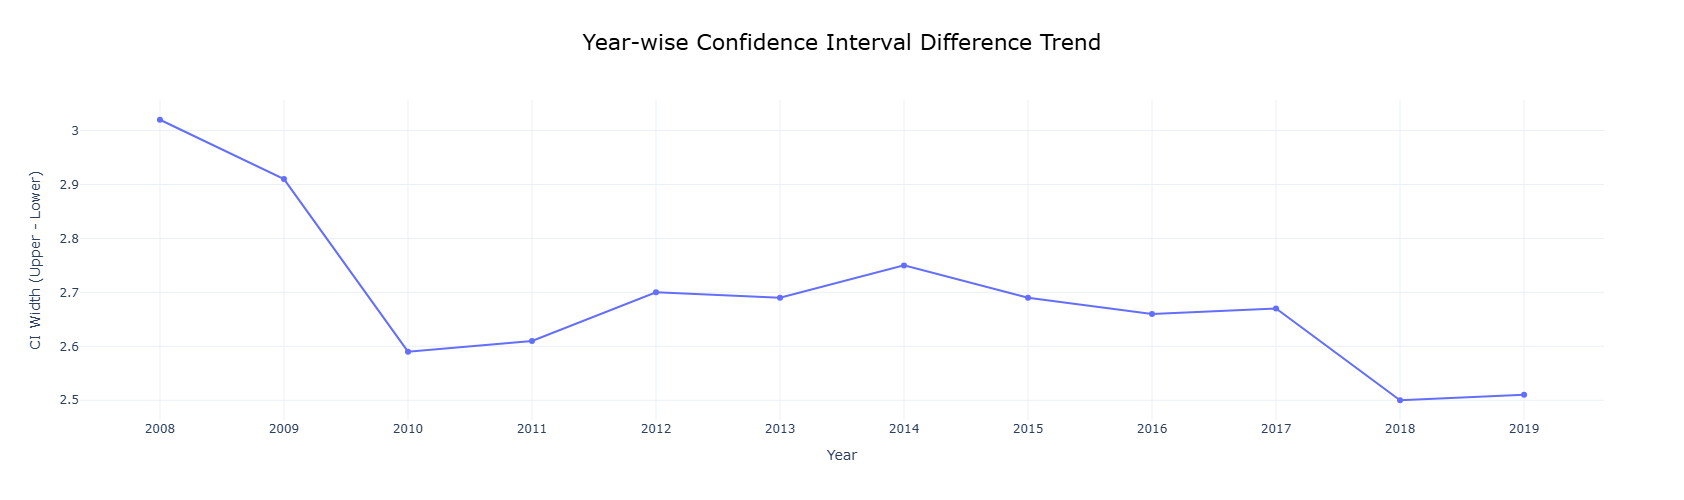

In [61]:
data['CI_Difference'] = data['Upper_Limit_of_Confidence_Interval'] - data['Lower_Limit_of_Confidence_Interval']  

ci_diff_by_year = data.groupby('Start_Year', as_index=False)['CI_Difference'].mean().round(2) 

fig = px.line(
    ci_diff_by_year,
    x="Start_Year",
    y="CI_Difference",
    markers=True,
    title='Year-wise Confidence Interval Difference Trend'
)

fig.update_layout(
    title=dict(
        text='Year-wise Confidence Interval Difference Trend',
        font=dict(size=22, color='black'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='CI Width (Upper - Lower)',
    template='plotly_white',
    height=500,
    width=900,
    xaxis=dict(
        tickmode='linear',
        dtick=1
    )
)

fig.show()


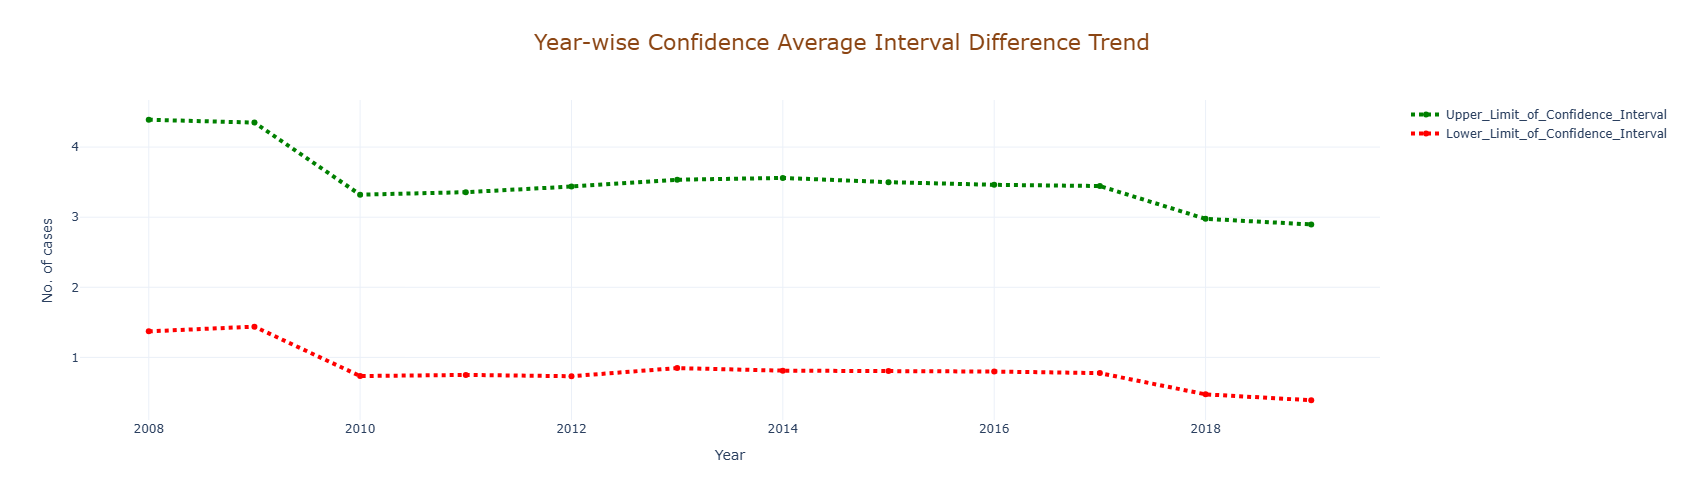

In [62]:
group_observed = data.groupby('Start_Year', as_index=False)['Upper_Limit_of_Confidence_Interval'].mean()
group_expected = data.groupby('Start_Year', as_index=False)['Lower_Limit_of_Confidence_Interval'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=group_observed['Upper_Limit_of_Confidence_Interval'],
    x=group_observed['Start_Year'],
    name='Upper_Limit_of_Confidence_Interval',
    line = dict(color='green', width=4, dash='dot'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    y=group_expected['Lower_Limit_of_Confidence_Interval'],
    x=group_expected['Start_Year'],
    line=dict(color='red', width=4, dash='dot'),
    name='Lower_Limit_of_Confidence_Interval',
    marker=dict(size=6)
))

fig.update_layout(
    title=dict(
        text='Year-wise Confidence Average Interval Difference Trend ',
        font=dict(size=22, color='saddlebrown'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='No. of cases',
    template='plotly_white',
    height=500,
    width=1300
)

fig.show()

## **REGIONAL COMPARISION**

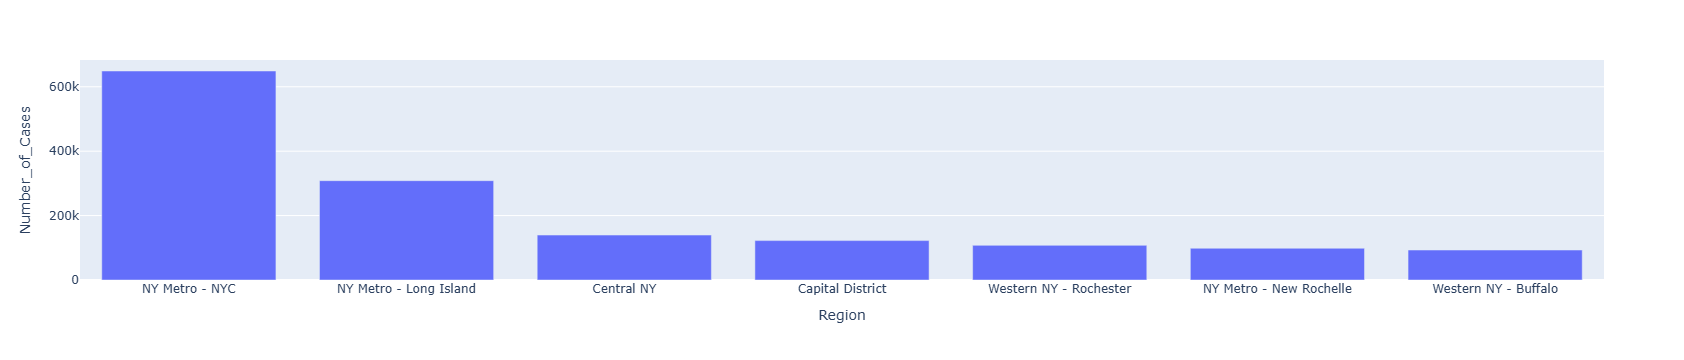

In [63]:
regional_case = data.groupby('Region', as_index=False)['Number_of_Cases'].sum()

regional_case = regional_case.sort_values(by='Number_of_Cases', ascending=False)

fig = px.bar(regional_case, x='Region', y='Number_of_Cases')

fig.update_layout(width = 1200)

fig.show()

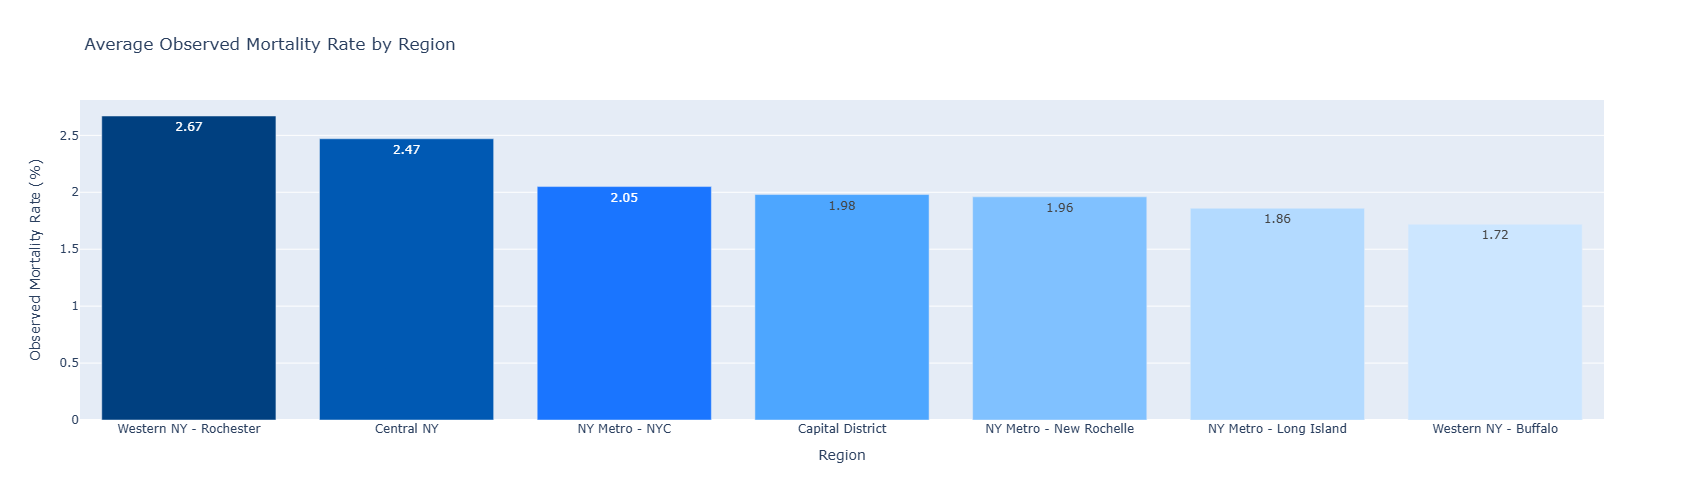

In [64]:
region_avg = data.groupby('Region', as_index=False)['Observed_Mortality_Rate'].mean().round(2)

region_avg = region_avg.sort_values(by='Observed_Mortality_Rate', ascending=False)

custom_colors = [
    '#004080',  
    '#0059b3',  
    '#1a75ff', 
    '#4da6ff', 
    '#80c1ff', 
    '#b3daff',  
    '#cce6ff',  
    "#e6f7ff"   
]

fig = px.bar(
    region_avg,
    x='Region',
    y='Observed_Mortality_Rate',
    color='Region',  # Different color for each region
    title='Average Observed Mortality Rate by Region',
    labels={'Observed_Mortality_Rate': 'Observed Mortality Rate (%)'},
    text='Observed_Mortality_Rate',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    width=1200,
    height = 500,
    showlegend=False 
)

fig.show()

## **HOSPITAL COMPARISION**

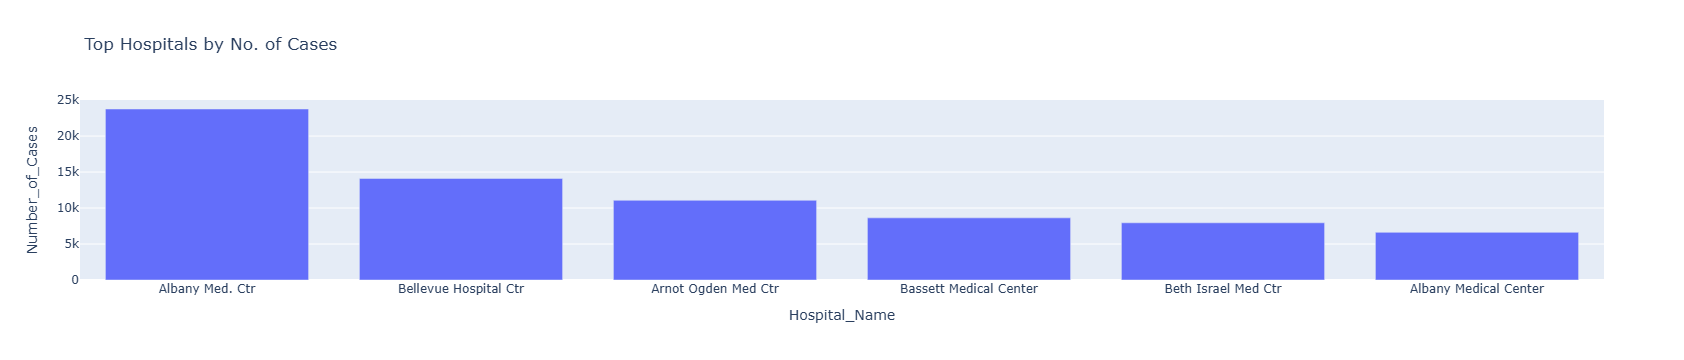

In [65]:
regional_case = data.groupby('Hospital_Name', as_index=False)['Number_of_Cases'].sum().head(6)

regional_case = regional_case.sort_values(by='Number_of_Cases', ascending=False)

fig = px.bar(regional_case, x='Hospital_Name', y='Number_of_Cases', title='Top Hospitals by No. of Cases')

fig.update_layout(width = 1200)

fig.show()

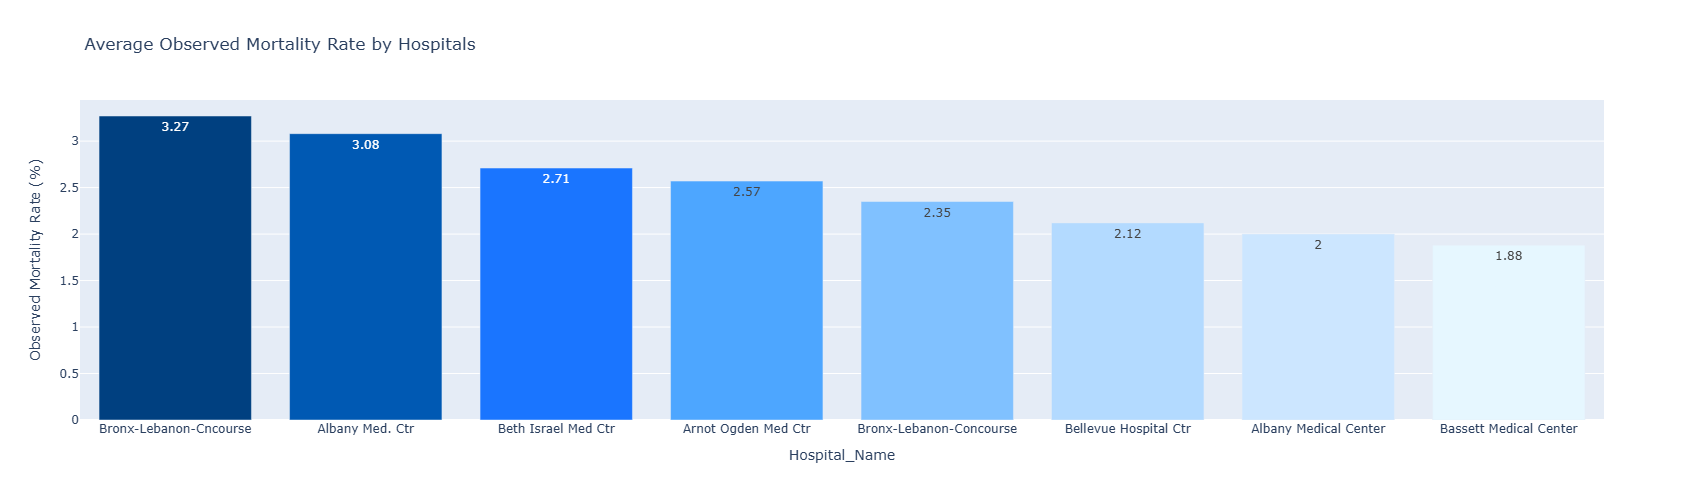

In [66]:
region_avg = data.groupby('Hospital_Name', as_index=False)['Observed_Mortality_Rate'].mean().round(2).head(8)

region_avg = region_avg.sort_values(by='Observed_Mortality_Rate', ascending=False)

custom_colors = [
    '#004080',  
    '#0059b3',  
    '#1a75ff', 
    '#4da6ff', 
    '#80c1ff', 
    '#b3daff',  
    '#cce6ff',  
    "#e6f7ff"   
]

fig = px.bar(
    region_avg,
    x='Hospital_Name',
    y='Observed_Mortality_Rate',
    color='Hospital_Name',  # Different color for each region
    title='Average Observed Mortality Rate by Hospitals',
    labels={'Observed_Mortality_Rate': 'Observed Mortality Rate (%)'},
    text='Observed_Mortality_Rate',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    width=1200,
    height = 500,
    showlegend=False 
)

fig.show()

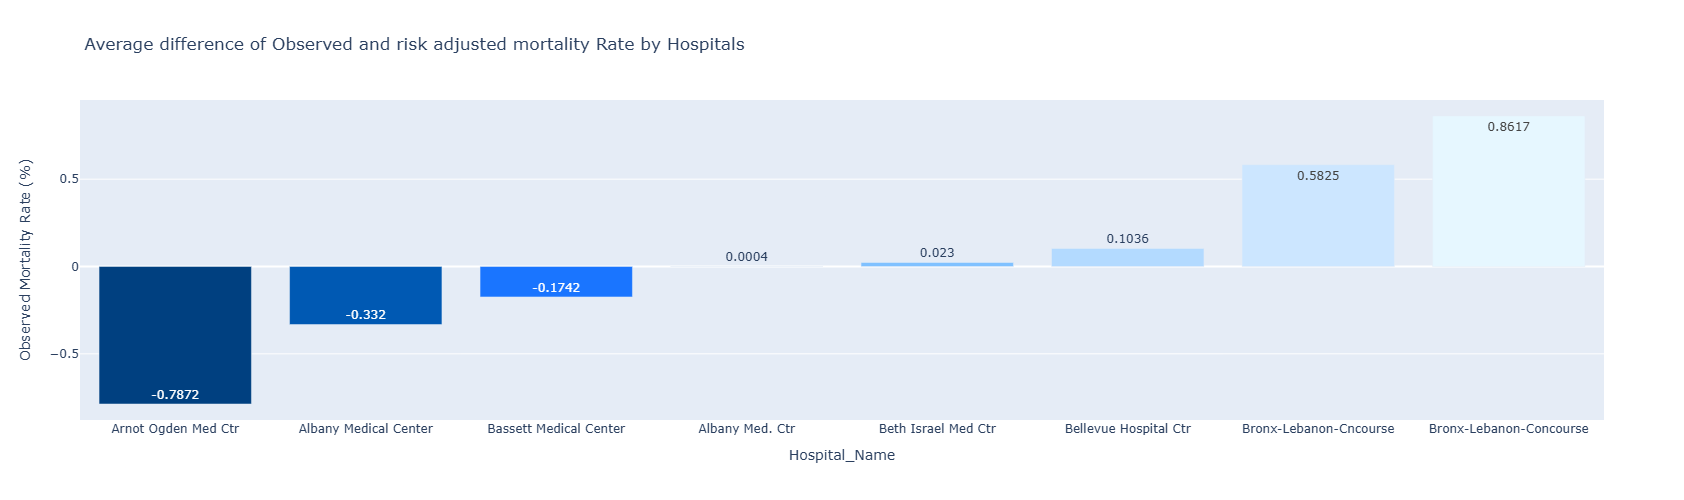

In [67]:
region_avg = data.groupby('Hospital_Name', as_index=False)['Observed_vs_RiskAdjusted_Difference'].mean().round(4).head(8)

region_avg = region_avg.sort_values(by='Observed_vs_RiskAdjusted_Difference')

custom_colors = [
    '#004080',  
    '#0059b3',  
    '#1a75ff', 
    '#4da6ff', 
    '#80c1ff', 
    '#b3daff',  
    '#cce6ff',  
    "#e6f7ff"   
]

fig = px.bar(
    region_avg,
    x='Hospital_Name',
    y='Observed_vs_RiskAdjusted_Difference',
    color='Hospital_Name',  # Different color for each region
    title='Average difference of Observed and risk adjusted mortality Rate by Hospitals',
    labels={'Observed_vs_RiskAdjusted_Difference': 'Observed Mortality Rate (%)'},
    text='Observed_vs_RiskAdjusted_Difference',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    width=1200,
    height = 500,
    showlegend=False 
)

fig.show()

### **Now, Let's find top 5 Hospitals**

* **Example of Ideal "Best Hospital":**

* Low Risk-Adjusted Mortality Rate

* Narrow Confidence Interval

* High Number of Cases

* Observed Mortality Rate lower than expected


In [68]:
data['Score'] = (
    data['Risk_Adjusted_Mortality_Rate'] +  
    (data['CI_Difference']) * 0.5 -
    data['Number_of_Cases'] / 1000  # Slight preference to high-volume centers
)

best_hospitals = data.sort_values(by='Score',ascending=True)
best_hospitals.head()

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference,CI_Difference,Score
87,Mount Sinai Hospital,NY Metro - NYC,Non-Emergency PCI,2010,4685,17,0.36,0.51,0.36,0.21,0.58,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,-0.15,0.00,0.37,-4.140
763,Mount Sinai Hospital,NY Metro - NYC,Non-Emergency PCI,2012,4571,13,0.28,0.51,0.36,0.19,0.62,Rate significantly lower than Statewide Rate,2012,2012,2012,Rate significantly lower than Statewide Rate,False,-0.23,-0.08,0.43,-3.996
28,Mount Sinai Hospital,NY Metro - NYC,All PCI,2010,4777,20,0.42,0.62,0.57,0.35,0.87,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,-0.20,-0.15,0.52,-3.947
354,Mount Sinai Hospital,NY Metro - NYC,Non-Emergency PCI,2011,4581,24,0.52,0.63,0.55,0.35,0.81,Rate not different than Statewide Rate,2011,2011,2011,Rate not different than Statewide Rate,True,-0.11,-0.03,0.46,-3.801
599,Mount Sinai Hospital,NY Metro - NYC,All PCI,2012,4708,16,0.34,0.57,0.60,0.34,0.97,Rate significantly lower than Statewide Rate,2012,2012,2012,Rate significantly lower than Statewide Rate,False,-0.23,-0.26,0.63,-3.793


In [69]:
top_hospitals = best_hospitals.groupby('Hospital_Name', as_index=False)['Score'].mean()

top_hospitals = top_hospitals.sort_values(by='Score', ascending=True)

top_5 = top_hospitals.head(10)

top_5


,Hospital_Name,Score
58,NYP-Columbia Presby.,0.958744
44,Mount Sinai Hospital,0.974897
64,NYU Langone Hosp-Brooklyn,1.154333
86,St. Joseph's Hospital,1.192000
69,North Shore Univ Hosp,1.332369
85,St. Francis Hospital,1.340048
56,NYP- Weill Cornell,1.455100
52,NYP NY Weill Cornell,1.501667
87,St. Josephs Hospital,1.509553
33,Long Island Jewish MC,1.557881


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TOP PERFORMING HOSPITAL IN US</div>

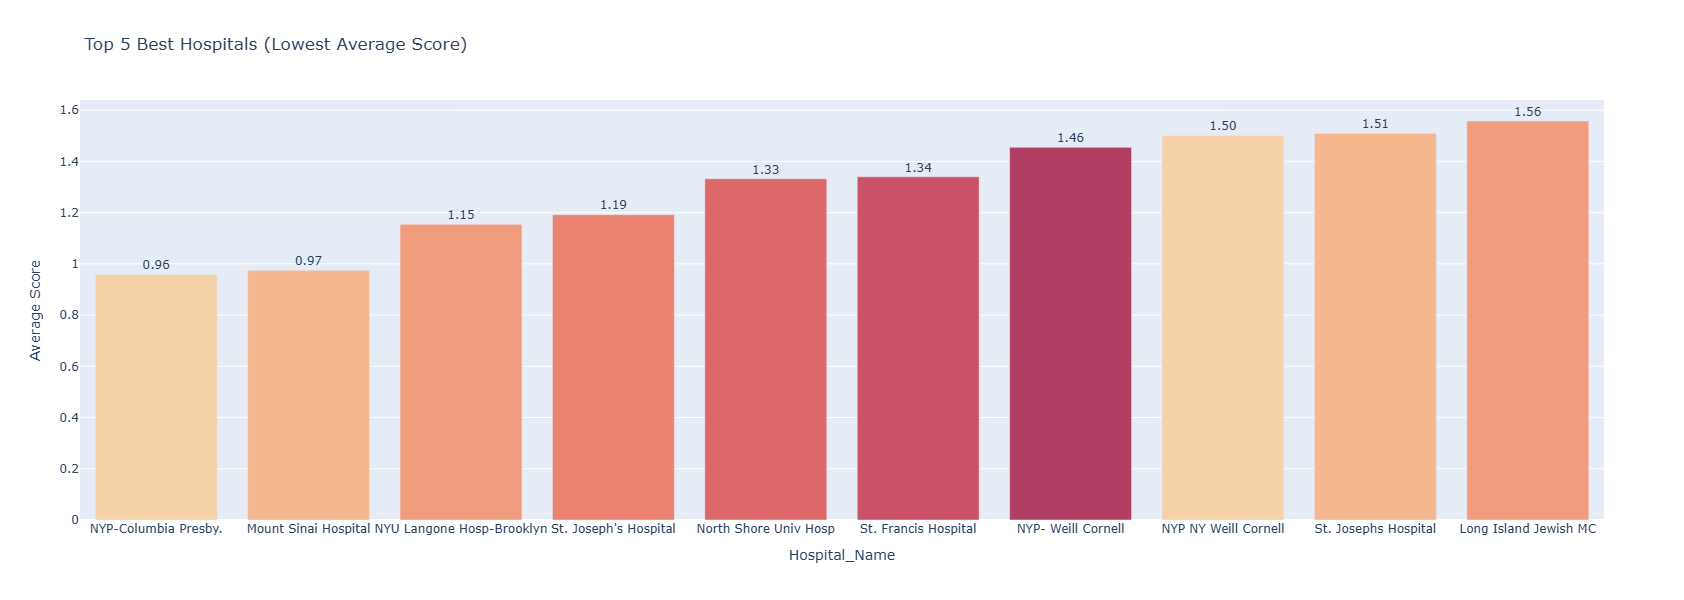

In [70]:
fig = px.bar(
    top_5,
    x='Hospital_Name',
    y='Score',
    title='Top 5 Best Hospitals (Lowest Average Score)',
    text='Score',
    color='Hospital_Name', 
    color_discrete_sequence=px.colors.sequential.Redor 
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Average Score',
    showlegend=False,
    width=900,
    height=600
)

fig.show()

In [71]:
data['Procedure'].unique()

array(['All PCI', 'Non-Emergency PCI', 'Valve or Valve/CABG', 'TAVR',
       'CABG', 'Emergency PCI'], dtype=object)

In [72]:
top_procedure = best_hospitals[best_hospitals['Hospital_Name'] == 'NYP-Columbia Presby.']
top_procedure.head()

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference,CI_Difference,Score
679,NYP-Columbia Presby.,NY Metro - NYC,Non-Emergency PCI,2012,2620,8,0.31,0.65,0.30,0.13,0.59,Rate significantly lower than Statewide Rate,2012,2012,2012,Rate significantly lower than Statewide Rate,False,-0.34,0.01,0.46,-2.090
775,NYP-Columbia Presby.,NY Metro - NYC,All PCI,2012,2791,17,0.61,0.92,0.67,0.39,1.07,Rate not different than Statewide Rate,2012,2012,2012,Rate not different than Statewide Rate,True,-0.31,-0.06,0.68,-1.781
268,NYP-Columbia Presby.,NY Metro - NYC,Non-Emergency PCI,2015,2227,13,0.58,0.67,0.65,0.34,1.11,Rate not different than Statewide Rate,2015,2015,2015,Rate not different than Statewide Rate,True,-0.09,-0.07,0.77,-1.192
227,NYP-Columbia Presby.,NY Metro - NYC,Non-Emergency PCI,2016,2055,12,0.58,0.84,0.58,0.30,1.01,Rate not different than Statewide Rate,2016,2016,2016,Rate not different than Statewide Rate,True,-0.26,0.00,0.71,-1.120
972,NYP-Columbia Presby.,NY Metro - NYC,All PCI,2013,2541,29,1.14,1.25,1.05,0.70,1.50,Rate not different than Statewide Rate,2013,2013,2013,Rate not different than Statewide Rate,True,-0.11,0.09,0.80,-1.091


In [73]:
top_procedure = top_procedure.groupby('Procedure', as_index=False)['Score'].mean()

top_procedure = top_procedure.sort_values(by='Score', ascending=True)

top = top_procedure.head(10)

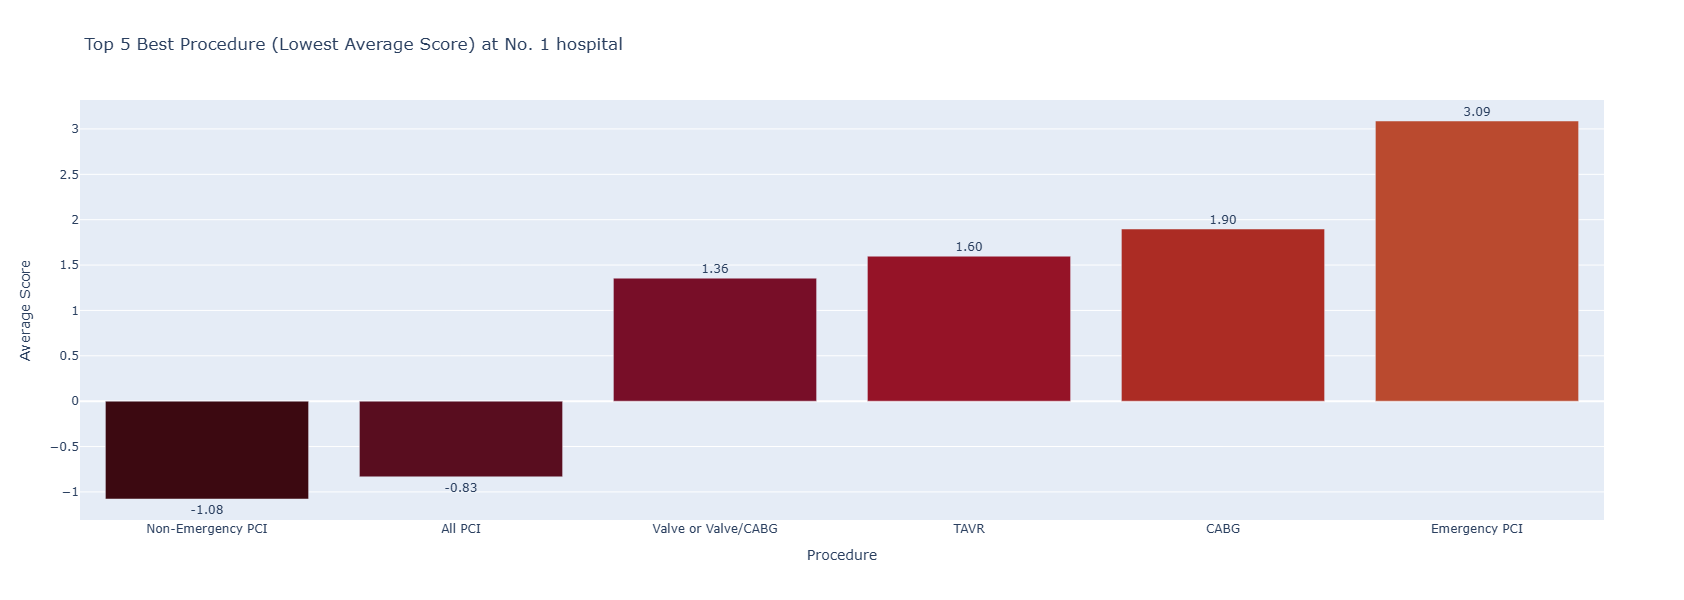

In [74]:
fig = px.bar(
    top,
    x='Procedure',
    y='Score',
    title='Top 5 Best Procedure (Lowest Average Score) at No. 1 hospital',
    text='Score',
    color='Procedure', 
    color_discrete_sequence=px.colors.sequential.amp_r
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Average Score',
    showlegend=False,
    width=900,
    height=600
)

fig.show()

In [75]:
data.head()

,Hospital_Name,Region,Procedure,Year_of_Hospital_Discharge,Number_of_Cases,Number_of_Deaths,Observed_Mortality_Rate,Expected_Mortality_Rate,Risk_Adjusted_Mortality_Rate,Lower_Limit_of_Confidence_Interval,Upper_Limit_of_Confidence_Interval,Comparison_Results,Start_Year,End_Year,Mid_Year,Comparison_Results_Category,Is_As_Expected_Mortality,Observed_vs_Expected_Difference,Observed_vs_RiskAdjusted_Difference,CI_Difference,Score
0,Albany Med. Ctr,Capital District,All PCI,2016,680,17,2.50,1.52,2.03,1.18,3.26,Rate not different than Statewide Rate,2016,2016,2016,Rate not different than Statewide Rate,True,0.98,0.47,2.08,2.390
1,White Plains Hospital,NY Metro - New Rochelle,Non-Emergency PCI,2015,338,1,0.30,0.64,0.34,0.00,1.91,Rate not different than Statewide Rate,2015,2015,2015,Rate not different than Statewide Rate,True,-0.34,-0.04,1.91,0.957
2,Bellevue Hospital Ctr,NY Metro - NYC,All PCI,2010,448,4,0.89,0.89,0.84,0.23,2.16,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,0.00,0.05,1.93,1.357
3,Beth Israel Med Ctr,NY Metro - NYC,All PCI,2010,1762,11,0.62,0.70,0.75,0.38,1.35,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,-0.08,-0.13,0.97,-0.527
4,Bronx-Lebanon-Cncourse,NY Metro - NYC,All PCI,2010,65,4,6.15,2.41,2.15,0.58,5.50,Rate not different than Statewide Rate,2010,2010,2010,Rate not different than Statewide Rate,True,3.74,4.00,4.92,4.545
